In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
x = np.array([ 0.1, 0.8, 1.7, 2.5, 3.4, 4.2,  5.1])
y = np.array([ 0.01, -1.13, 0.02, 0.92, -0.01, -0.98, 0.1])+5

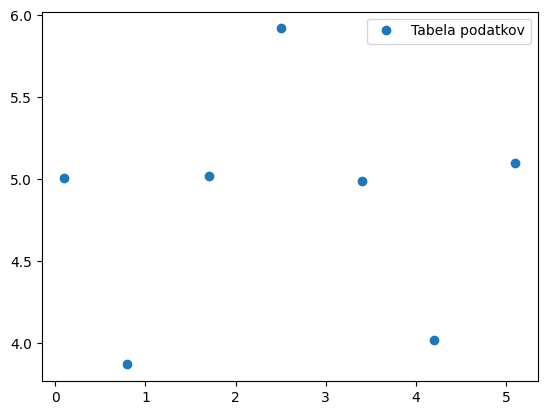

In [18]:
plt.plot(x, y, 'o', label='Tabela podatkov')
plt.legend();

In [19]:
from scipy.optimize import curve_fit

In [20]:
def func(x, A, ω, ϕ, a):
    return A*np.sin(ω*x+ϕ)+a

In [21]:
popt, pcov = curve_fit(func, x, y, p0=[1, 1, 0, 0])
popt

array([ 1.01209205,  1.89836283, -3.28393886,  4.99253512])

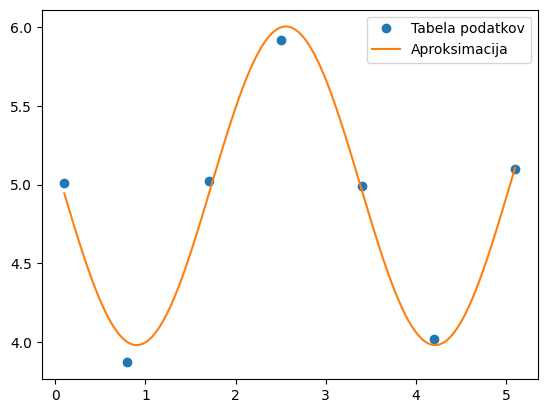

In [22]:
x_g = np.linspace(np.min(x), np.max(x), 500)
y_g = func(x_g, *popt) # bodi pozorni kako smo v funkcijo posredovali parametre
plt.plot(x, y, 'o', label='Tabela podatkov')
plt.plot(x_g, y_g, label='Aproksimacija')
plt.legend();